In [1]:
# make simulated data. The assumptions are thaat the data is generated as follows:
# I have written the below as equalities, but in reality they are random variables.

# N_i = Poisson(lambda_i) . the Number of birds at site i is a Poisson random variable with mean lambda_i
# p_ij = Beta(alpha, beta) . The singing rate (p of singing in a given 5s window) of a bird at site i on day j is a Beta random variable with parameters alpha and beta
# n_song_clips_ij ~ Binomial(N_i, p_ij) . The number of song clips recorded at site i on day j is a Binomial random variable with parameters N_i and p_ij


In [21]:
def make_simulated_data(pop_lambda, p_call, nsites, nclips, pos_gauss_params, neg_gauss_params):
    """
    Make simulated data. The assumptions are thaat the data is generated as follows:
    Number of birds at site i is a Poisson random variable with mean pop_lambda
    The singing rate (p of singing in a given 5s window) is p_call
    The number of song clips recorded at site i on day j is a Binomial random variable with parameters N_i and p_ij
    The positive and negative gaussian parameters are pos_gauss_params (mu_1, sd_1) and neg_gauss_params (mu2, sd2)
    """
    import numpy as np
    import pandas as pd
    import scipy.stats as stats
    from scipy.stats import poisson, beta, binom
    import random

    # make the population sizes for each site
    N = poisson.rvs(pop_lambda, size=nsites)

    p_nocall = (1 - p_call)**N # p of a clip containing no calls

    # number of clips containing no calls at each site
    num_nocall_clips = np.random.binomial(nclips, p_nocall)

    # now make an array where each row is a site, and each column is a clip
    # each entry is the score for that clip
    # the score is a random variable from a mixture of two gaussians
    # the first gaussian is the positive gaussian, the second is the negative gaussian
    # so draw num_nocall_clips from the negative gaussian, and nclips - num_nocall_clips from the positive gaussian
    scores = np.zeros((nsites, nclips))
    for i in range(nsites):
        scores[i, :num_nocall_clips[i]] = np.random.normal(neg_gauss_params[0], neg_gauss_params[1], num_nocall_clips[i])
        scores[i, num_nocall_clips[i]:] = np.random.normal(pos_gauss_params[0], pos_gauss_params[1], nclips - num_nocall_clips[i])

    # make the data frame
    scores_df = pd.DataFrame(scores)
    # label the columns and rows
    scores_df.columns = ['clip' + str(i) for i in range(nclips)]
    scores_df.index = ['site' + str(i) for i in range(nsites)]

    # add in a column for true_n_birds, true_p_call, and true_n_positive_clips
    scores_df['true_n_birds'] = N
    scores_df['true_p_call'] = p_call
    scores_df['true_n_positive_clips'] = nclips - num_nocall_clips

    return scores_df

In [22]:
df = make_simulated_data(1, 0.5, 10, 250, (5, 2), (-2, 1))

In [23]:
df

,clip0,clip1,clip2,clip3,clip4,clip5,clip6,clip7,clip8,clip9,...,clip243,clip244,clip245,clip246,clip247,clip248,clip249,true_n_birds,true_p_call,true_n_positive_clips
site0,-4.076644,-3.693525,-2.984153,-0.848518,-1.512706,-0.869431,-3.736720,-2.182646,-1.993010,-2.123663,...,5.272090,5.379370,3.497684,5.810093,5.895264,3.690046,6.841203,1,0.5,133
site1,-1.981323,-2.765489,-3.071961,-2.292391,-1.447931,-0.960953,-3.427593,-2.578294,-2.636092,-1.738216,...,5.237293,6.148761,4.234570,5.005792,4.573954,6.591803,3.834941,1,0.5,129
site2,-1.140284,-0.059271,-1.879554,0.983253,-2.622752,-3.920007,-0.110116,-1.423967,-1.843122,-0.161686,...,-0.859739,-2.025400,-1.982285,-1.496441,-1.567305,-1.704405,-2.440178,0,0.5,0
site3,-2.283563,-2.194278,-1.550031,-2.867376,-3.297389,-2.333585,-0.237811,-1.824235,-1.399753,-2.004141,...,3.589017,7.384307,4.315856,5.714163,8.214323,5.751209,7.684353,1,0.5,116
site4,-2.008490,-1.513261,-3.853135,-3.455257,-1.375812,-2.516590,-2.610230,-2.531104,-2.347311,-2.957414,...,6.114486,8.777949,6.144620,-0.123896,3.619268,2.835982,0.456208,1,0.5,108
site5,-4.782699,-4.390289,-2.587133,-2.210282,-1.604837,-1.569746,-2.583539,-3.586705,-1.856213,-2.149164,...,-3.341377,-0.113025,-1.217700,-1.114708,-1.437778,-1.663794,-4.133993,0,0.5,0
site6,-2.947530,-2.583447,-3.098107,-1.374225,-2.495239,-1.246828,-2.218318,-2.518768,-3.780991,-1.440018,...,6.198811,7.415084,3.247203,0.790535,7.229989,4.723407,3.366819,1,0.5,113
site7,-2.846749,-2.246975,-3.504619,-2.666904,-2.033325,-3.323225,-0.804714,-2.193169,-1.842902,-2.917612,...,5.285193,1.762686,6.360137,9.867444,3.069658,7.622280,4.406575,1,0.5,128
site8,-1.313102,-1.996983,-0.488399,-2.568608,-2.774065,-2.416593,-0.128098,-2.595001,-0.457513,0.114363,...,3.960184,4.827314,4.879562,4.284758,4.495619,1.928202,3.817629,1,0.5,122
site9,-2.368739,-1.543267,-2.208710,-1.500332,-2.324854,0.271731,-0.463959,-3.162716,-3.248828,-1.483189,...,5.251293,3.665621,7.746428,1.964756,5.003524,2.956304,4.004321,1,0.5,120


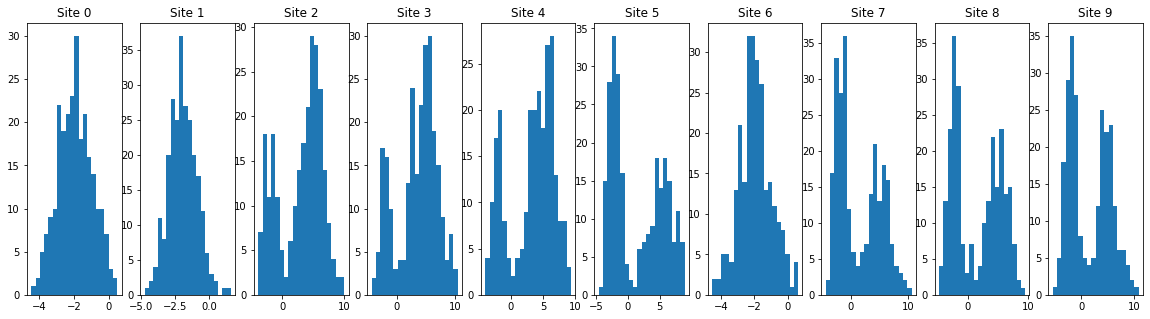

In [20]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(20, 5))
for i in range(10):
    axs[i].hist(df.iloc[i, :], bins=20)
    axs[i].set_title('Site ' + str(i))

In [ ]:
for pop_lambda in np.arange(0.1, 4, 0.1):
  #### setup the simulation details ####
  NSITES <- 100
  NFILES <- 720
  
  ##### Parameters we want the model to discover #####
  # beta distribution parameters for call rate
  #alpha <- 1.1
  #beta <- 8.9
  #mean_p_call_rate <- alpha / (alpha+beta)
  
  # positive normal params
  positive_mu = 5
  positive_sd = 2
  # negative normal params
  negative_mu = -2
  negative_sd = 1
  
  ###### set up vectors for storing the results #####
  true_z <- vector() # occupancy
  abundance <- vector()
  p_call <- vector()
  p_at_least_1_singer <- vector() # is (1 - no birds sing at all)
  p_no_singers <- vector() # probability no bird sings in each period
  num_positives <- vector() # number of files that are from positives
  num_negatives <- vector() # number of files that are from positives
  scores <- matrix(NA, nrow = NSITES, ncol=NFILES)
  theta <- vector()
  z_data <- rep(NA, NSITES)# the annotations
  annotation_all <- matrix(NA, nrow = NSITES, ncol = NFILES)
  
  ###### loop over each site to make the data ####
  for (i in 1:NSITES) {
    #true_z[i] <- rbernoulli(1,psi)
    abundance[i] <- rpois(1, lambda)
    
    #p_call[i] <- rbeta(1, alpha, beta) 
    p_call[i] <- 0.25
    
    p_at_least_1_singer[i] <- (1-(1-p_call[i])**abundance[i])
    num_positives[i] <- rbinom(1, NFILES, p_at_least_1_singer[i])
    num_negatives[i] <- NFILES - num_positives[i]
    theta[i] <- num_positives[i]/NFILES
    scores[i,] <- c(rnorm(num_positives[i], positive_mu, positive_sd), rnorm(num_negatives[i], negative_mu, negative_sd))
  }
  
  filename = sprintf("%ssimulated_scores%g.csv", save_dir, lambda)
  write.csv(scores, file=filename)
  
  # write the rdata file with all the variables
  
  # save the data
  rdata_fname = sprintf("%ssimulated_scores%g.Rdata", save_dir, lambda)
  save(list = c("NSITES", "NFILES", "p_call", "positive_mu", "positive_sd", "negative_mu", "negative_sd","lambda", "annotation_all", "scores"), file = rdata_fname)
}
